# Logistic Regression - Simple Example
## I.E. Binary choice comparison

Utilizes the Titanic Dataset from Kaggle.com. We have a training set and a testing set (CSV), but I'm only working on the training set as if it's the full set - showing how to split that into testing/training at the end. This will allow us to see the accuracy of the model

We'll walk through exploring, cleansing, and applying regression to this dataset

In [1]:
#Initial Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import training data
titanic = pd.read_csv('titanic.csv')

#### Exploratory

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


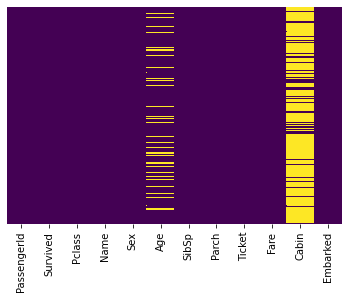

In [4]:
#We have some missing data here, so we're going to map out where NaN exists
#We might be able to take care of age, but cabin is probably too bad to save
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Clean the missing data
You could jump to the end if you already have clean data, this one is just a bit messy

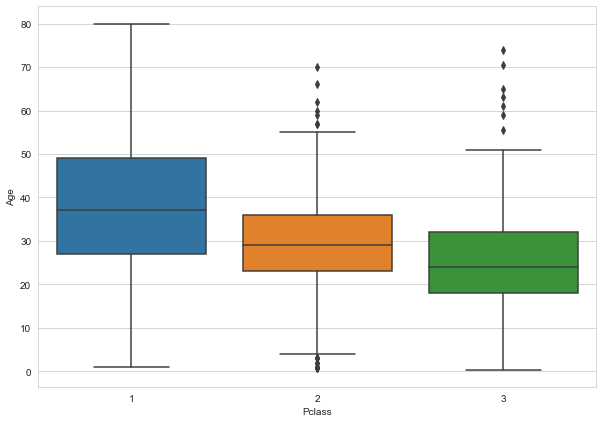

In [5]:
#Determine the average ages of passengers by class
#In an attempt to fix the NaN for this column somewhat
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [6]:
#Fill out the Age column with the average ages of passengers per class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37 #Return the avg age of passengers in the 1st class
        elif Pclass == 2:
            return 29 #2nd class
        else:
            return 24 #3rd class
    else:
        return Age
    
#Apply the function to the Age column
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

#Drop the cabin data (plus anything else) since it's unsalvagable / not a big deal
titanic.drop('Cabin',axis=1,inplace=True)
titanic.dropna(inplace=True)

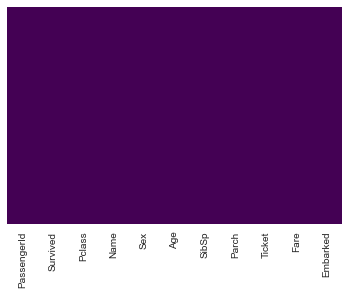

In [7]:
#Recheck the heatmap
#No more problems with Age
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Other data cleansing, Parse down dataset

In [8]:
#Since Sex and Embark are columns that are perfect predictors of one another (Male of 0 always means 1 of Female)
#We merge these into single columns
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [9]:
#Add the new columns to the dataset
titanic = pd.concat([titanic,sex,embark],axis=1)

In [22]:
#Drop the columns we can't use
titanic.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [23]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#### Run Machine Learning Algorithm
Utilizing the training set ONLY and split it (pretending we don't have two CSV files already)

Determine survival

In [11]:
#Assign variables
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#Choose the test size
#Test size = % of dataset allocated for testing (.3 = 30%)
#Random state = # of random splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
#Object, added max_inter since I hit a limit later
logmodel = LogisticRegression(max_iter=10000)

In [16]:
#Fit model
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [17]:
#Form predictions
predictions = logmodel.predict(X_test)

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [19]:
#Simple report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [20]:
#Or print out a confusion matrix
print(confusion_matrix(y_test,predictions))

[[150  13]
 [ 32  72]]
